In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('../input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

../input\iris\Iris.csv
../input\mall-customers\Mall_Customers.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [3]:
df = pd.read_csv('../input/iris/Iris.csv')
df.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
115,116,6.4,3.2,5.3,2.3,Iris-virginica
102,103,7.1,3.0,5.9,2.1,Iris-virginica
99,100,5.7,2.8,4.1,1.3,Iris-versicolor
51,52,6.4,3.2,4.5,1.5,Iris-versicolor
3,4,4.6,3.1,1.5,0.2,Iris-setosa


In [4]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Exploratory Data Analysis

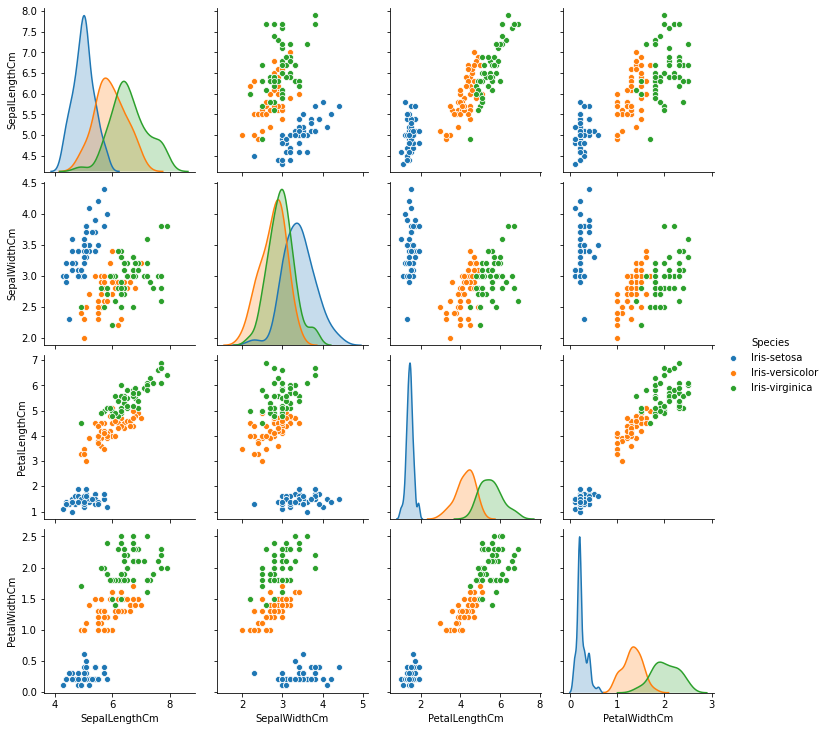

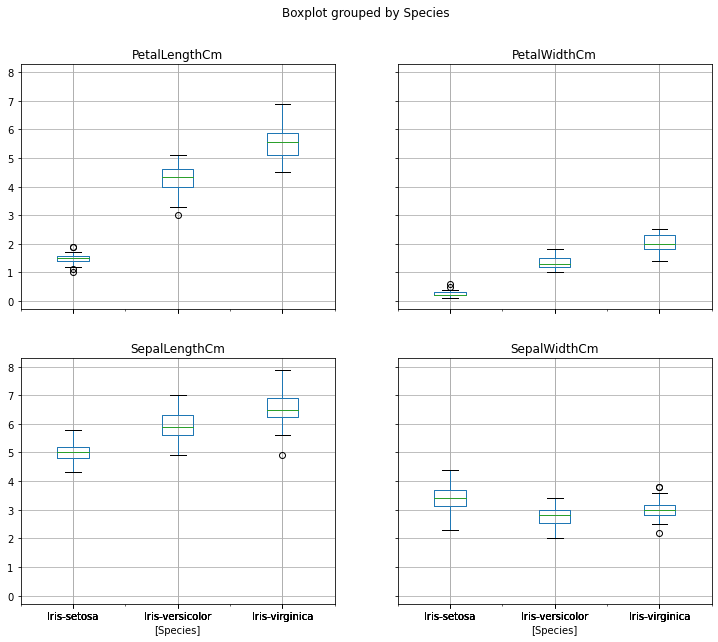

In [6]:
sns.pairplot(df[df.columns.drop('Id')],hue='Species')
df.drop("Id", axis=1).boxplot(by="Species", figsize=(12, 10))
plt.show()

**Analysis**
* almost all variabels were able to distinguish the Species except SepalWidth
* SepalWidth with SepalLength is performing little low in distinguishing species
* SepalWidth alone is performing bad, it always needs to be used along with other variables

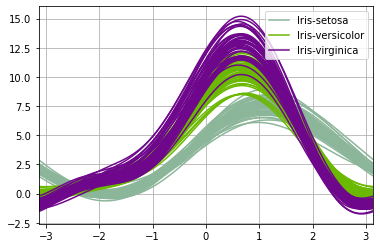

In [7]:
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm','Species']
from pandas.plotting import andrews_curves
andrews_curves(df[columns], "Species")
plt.show()

# Univariate Analysis

Iris-versicolor    0.333333
Iris-virginica     0.333333
Iris-setosa        0.333333
Name: Species, dtype: float64


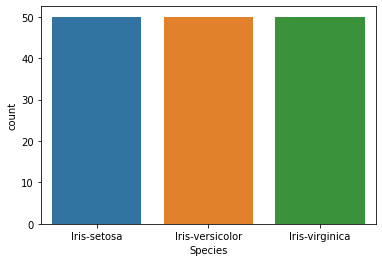

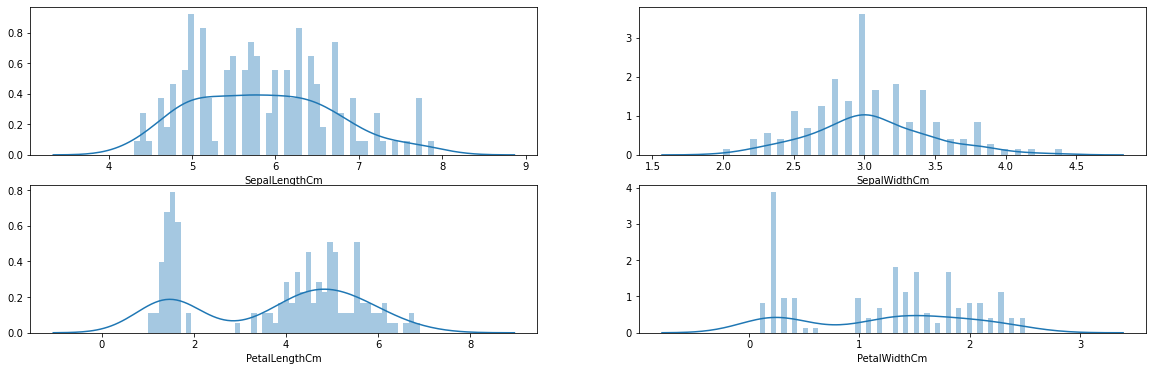

In [8]:
sns.countplot(x=df['Species'])
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(20,6))
print(df['Species'].value_counts(normalize=True))
sns.distplot(df['SepalLengthCm'],bins=50,ax=ax[0,0])
sns.distplot(df['SepalWidthCm'],bins=50,ax=ax[0,1])
sns.distplot(df['PetalLengthCm'],bins=50,ax=ax[1,0])
sns.distplot(df['PetalWidthCm'],bins=50,ax=ax[1,1])
plt.show()

**Analysis**
* Species are equally distributed
* SepalLength and SepalWidth are normally distributed
* PetalLength and PetalWidth are having two bumps

## Normalizing the PetalLengthCm using QuantileTransformer

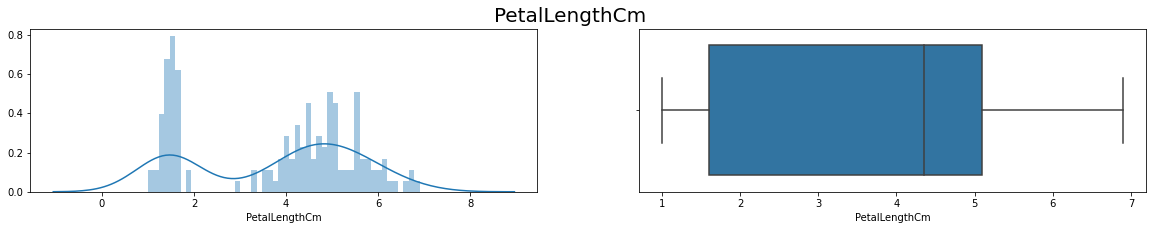

In [9]:
fig,ax = plt.subplots(1,2,figsize=(20,3))
sns.distplot(df['PetalLengthCm'],bins=50,ax=ax[0])
sns.boxplot(df['PetalLengthCm'],ax=ax[1])
plt.suptitle('PetalLengthCm',fontsize=20)
plt.show()

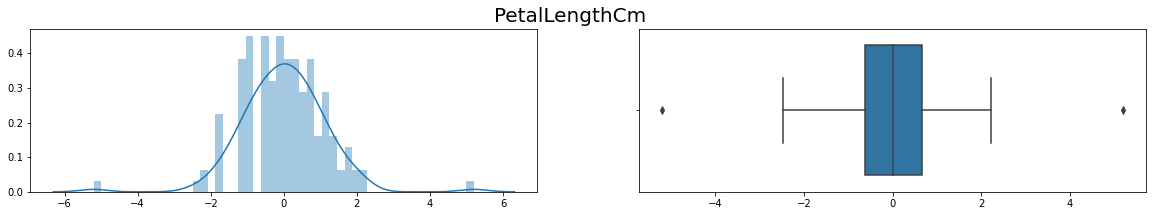

In [10]:
quantile_transformer = preprocessing.QuantileTransformer(
    output_distribution='normal',n_quantiles=len(df), random_state=0)
X_trans = quantile_transformer.fit_transform(df['PetalLengthCm'].values.reshape((len(df),1)))
fig,ax = plt.subplots(1,2,figsize=(20,3))
plt.suptitle('PetalLengthCm',fontsize=20)
sns.distplot(X_trans,bins=50,ax=ax[0])
sns.boxplot(X_trans,ax=ax[1])
plt.show()

## Normalizing the PetalWidthCm using QuantileTransformer

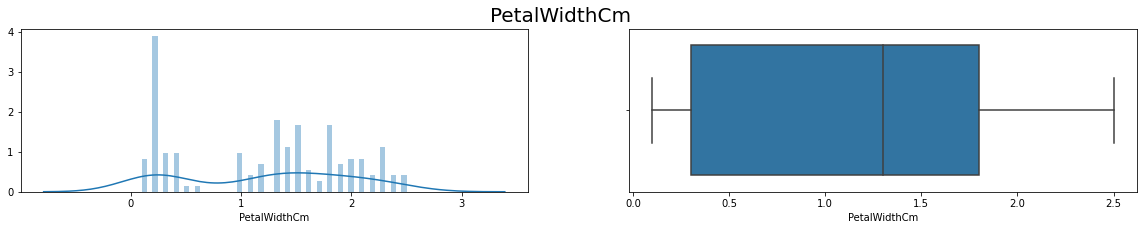

In [11]:
fig,ax = plt.subplots(1,2,figsize=(20,3))
sns.distplot(df['PetalWidthCm'],bins=50,ax=ax[0])
sns.boxplot(df['PetalWidthCm'],ax=ax[1])
plt.suptitle('PetalWidthCm',fontsize=20)
plt.show()

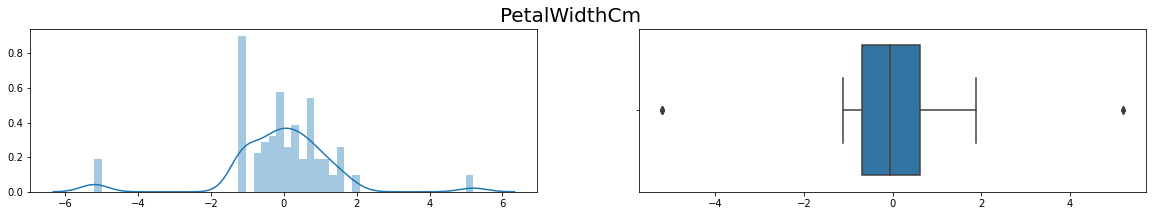

In [12]:
X_trans = quantile_transformer.fit_transform(df['PetalWidthCm'].values.reshape((len(df),1)))
fig,ax = plt.subplots(1,2,figsize=(20,3))
sns.distplot(X_trans,bins=50,ax=ax[0])
sns.boxplot(X_trans,ax=ax[1])
plt.suptitle('PetalWidthCm',fontsize=20)
plt.show()

# Split the data

In [13]:
X = df.drop(['Id','Species'],axis=1)
y = df['Species']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.copy(),y.copy(),test_size=0.3,random_state=0)

## Normalizing PetalWidthCm and PetalLengthCm using QuantileTransformer

In [15]:
quantile_transformer = preprocessing.QuantileTransformer(output_distribution='normal',n_quantiles=len(X_train), random_state=0)
X_train.loc[:,['PetalWidthCm','PetalLengthCm']]=quantile_transformer.fit_transform(X_train[['PetalWidthCm','PetalLengthCm']].values.reshape((len(X_train),2)))
X_test.loc[:,['PetalWidthCm','PetalLengthCm']]=quantile_transformer.transform(X_test[['PetalWidthCm','PetalLengthCm']].values.reshape((len(X_test),2)))

In [16]:
X_train.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,105.000000,105.000000,105.000000,105.000000
mean,5.893333,3.044762,-0.004693,-0.091531
std,0.876868,0.441366,1.193667,1.573531
min,4.300000,2.000000,-5.199338,-5.199338
25%,5.100000,2.800000,-0.629768,-0.674490
50%,5.800000,3.000000,0.012051,-0.084458
75%,6.500000,3.300000,0.659437,0.705066
max,7.900000,4.400000,5.199338,5.199338


# Scale the data

In [17]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler

class CustomScaler(BaseEstimator):#, TransformerMixin):
    def __init__(self, columns ):#, copy=True, with_mean=True, with_std=True):
        self.scaler = StandardScaler()#(copy, with_mean, with_std)
        self.columns = columns
        self.mean_ = None
        self.std_ = None
    
    def fit(self, X, y=None):
        self.scaler.fit(X[self.columns], y)
        self.mean_ = np.mean(X[self.columns])
        self.std_ = np.std(X[self.columns])
        return self
    
    def transform(self, X, y=None):#, copy=None):
        init_col_order = X.columns
        X_scaled = pd.DataFrame(self.scaler.transform(X[self.columns]), columns=self.columns,index=X.index)
        X_not_scaled = X.loc[:, ~X.columns.isin(self.columns)]
        return pd.concat([X_not_scaled, X_scaled], axis=1)[init_col_order]

In [18]:
columns_to_scale = ['SepalLengthCm', 'SepalWidthCm',  'PetalWidthCm', 'PetalLengthCm']

scaler = CustomScaler(columns_to_scale)
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)

In [19]:
X_train.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,1.050000e+02,1.050000e+02,1.050000e+02,1.050000e+02
mean,-1.249794e-15,-5.075305e-17,4.229421e-17,-2.960595e-17
std,1.004796e+00,1.004796e+00,1.004796e+00,1.004796e+00
min,-1.825788e+00,-2.378463e+00,-4.372707e+00,-3.261648e+00
25%,-9.090745e-01,-5.572150e-01,-5.261708e-01,-3.722549e-01
50%,-1.069499e-01,-1.019031e-01,1.409526e-02,4.516645e-03
75%,6.951746e-01,5.810647e-01,5.590463e-01,5.086761e-01
max,2.299424e+00,3.085280e+00,4.380609e+00,3.378545e+00


# Model

In [20]:
from sklearn import metrics

# Support Vector Machine (SVM)

In [21]:
from sklearn import svm
model = svm.SVC()
model.fit(X_train,y_train) 
prediction=model.predict(X_test)
print('The accuracy of the SVM is:',metrics.accuracy_score(prediction,y_test))

The accuracy of the SVM is: 0.9777777777777777


# Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,y_test))

The accuracy of the Logistic Regression is 0.9777777777777777


# K-Nearest Neighbours

In [23]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction,y_test))

The accuracy of the KNN is 0.9777777777777777


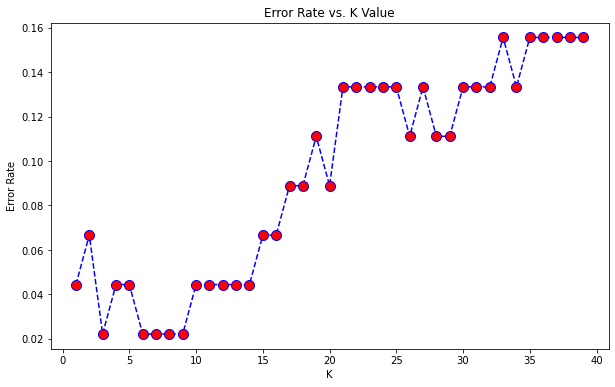

In [24]:
error_rate = []
x = range(1,40)
for i in x:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(10,6))
plt.plot(x,error_rate,color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

**Analysis**
* from the above plot it is clear that the data converges only for k=3,6,7,8,9 

# Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(X_train,y_train) 
prediction=model.predict(X_test) 
print('The accuracy of the Decision Tree is ',metrics.accuracy_score(prediction,y_test))

The accuracy of the Decision Tree is  0.9333333333333333


# Random Fores Classifier

In [26]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20,criterion='entropy',random_state=0)
model.fit(X_train,y_train) 
prediction=model.predict(X_test) 
print('The accuracy of the Random Forest is ',metrics.accuracy_score(prediction,y_test))

The accuracy of the Random Forest is  0.9777777777777777


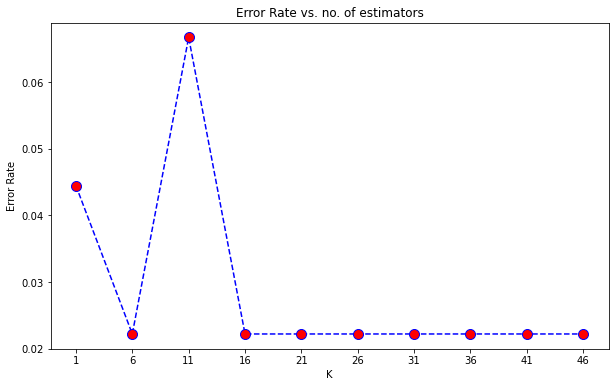

In [27]:
error_rate = []
x = range(1,50,5)
for i in x:
    knn = RandomForestClassifier(n_estimators=i,criterion='entropy',random_state=0)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(10,6))
plt.plot(x,error_rate,color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. no. of estimators')
plt.xlabel('K')
plt.xticks(x)
plt.ylabel('Error Rate')
plt.show()

**Analysis**
* here we can see that for only values between ~6 to ~16 are unable to classify
* rest all are able to classify with accuracy of 97% 